In [ ]:
# Importing libraries #
!pip install apyori
!pip install catboost
import pandas as pd
import numpy as np
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format',  '{:.2f}'.format)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Importing the dataset
df = pd.read_csv('/content/Assignment-1_Data.csv', delimiter=';')

df_copy = df.copy()
df_copy.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-2-0fbffc68aa12>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Assignment-1_Data.csv', delimiter=';')


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.00,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.00,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.00,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.00,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.00,United Kingdom


In [ ]:
#Since the "Price" variable is supposed to be a numerical value I need to Replace commas with periods in the column so that it's detected as a numeric value by the compiler
df_copy['Price'] = df_copy['Price'].str.replace(',', '.').astype(float)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_copy.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  float64
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
descriptive_stats = df_copy.describe()
print(descriptive_stats)


       Quantity     Price  CustomerID
count 522064.00 522064.00   388023.00
mean      10.09      3.83    15316.93
std      161.11     41.90     1721.85
min    -9600.00 -11062.06    12346.00
25%        1.00      1.25    13950.00
50%        3.00      2.08    15265.00
75%       10.00      4.13    16837.00
max    80995.00  13541.33    18287.00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-6-4ed091aad05f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_copy.corr()


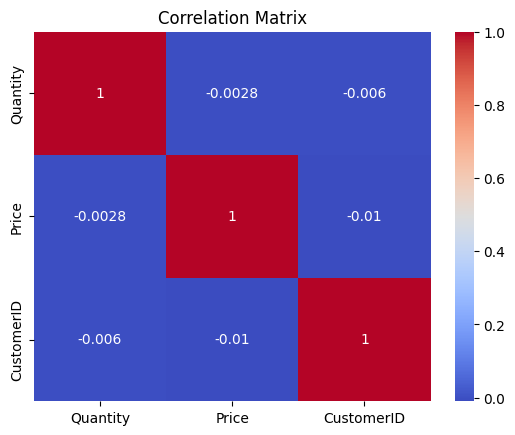

In [ ]:
#visualizing the correlation matrix for numerical columns
correlation_matrix = df_copy.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


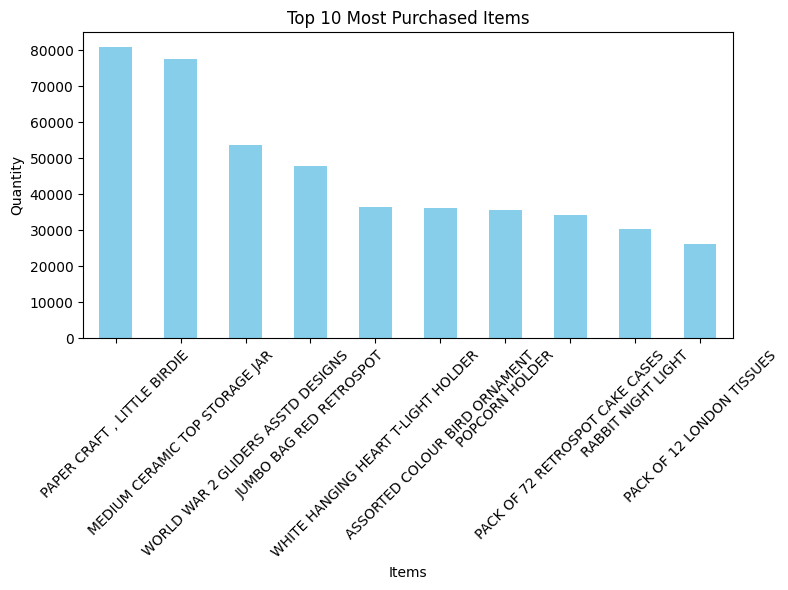

In [ ]:
#Visualizing the top 10 most purchased items
item_quantities = df_copy.groupby('Itemname')['Quantity'].sum()

top_10_items = item_quantities.nlargest(10)

plt.figure(figsize=(8, 6))
top_10_items.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Purchased Items')
plt.xlabel('Items')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


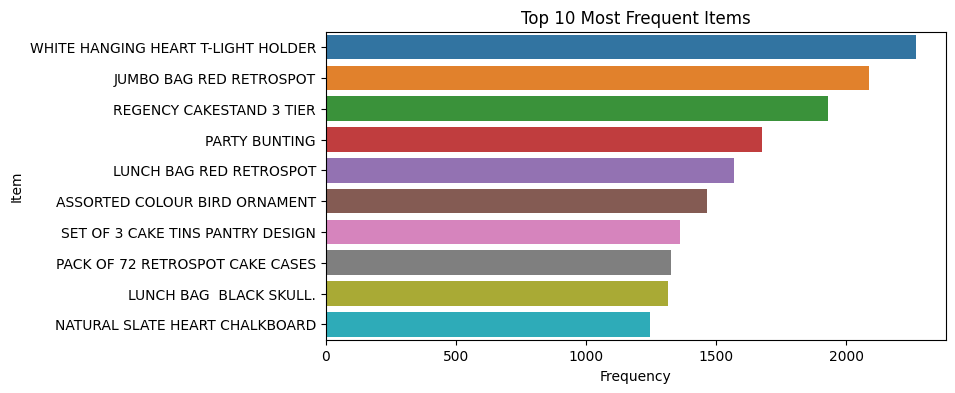

In [ ]:
#Visualizing the top 10 most frequently bought items.
top_N = 10
item_counts = df_copy['Itemname'].value_counts().nlargest(top_N)
plt.figure(figsize=(8, 4))
sns.barplot(x=item_counts.values, y=item_counts.index, orient='h')
plt.xlabel('Frequency')
plt.ylabel('Item')
plt.title(f'Top {top_N} Most Frequent Items')
plt.show()


In [ ]:
#Checking for missing values
print(df_copy.isnull().sum())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64


In [ ]:
#Changing missing values in numeric columns with the mean
numeric_columns = df_copy.select_dtypes(include=['float64', 'int64']).columns.tolist()

for col in numeric_columns:
    if df_copy[col].isnull().sum() > 0:
        col_mean = df_copy[col].mean()
        df_copy[col].fillna(col_mean, inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Changing missing values in categorical columns with the most frequent value
categorical_columns = df_copy.select_dtypes(include=['object']).columns.tolist()

for col in categorical_columns:
    if df_copy[col].isnull().sum() > 0:
        col_mode = df_copy[col].mode()[0]
        df_copy[col].fillna(col_mode, inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Checking for missing values again
print(df_copy.isnull().sum())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64


In [ ]:
#Grouping the transactions based on their Country
df_copy['Country'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


United Kingdom          487622
Germany                   9042
France                    8408
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Sweden                     451
Unspecified                446
Austria                    398
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Greece                     145
Malta                      112
United Arab Emirates        68
RSA                         58
Lebanon                     45
Lithuania                   35
Brazil                      32
Bahrain                     18
Saudi Arabia                 9
Name: Country, dtype: int64

In [ ]:
#Removing the "postage" item from the dataset because I realized that this item seems to be present in almost every transaction, this leads to a not useful entry for the analysis.
df_copy = df_copy[df_copy['Itemname'] != 'POSTAGE']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Selecting the transactions for UK and creating association rules, preparing the data in a transactional format, where each row represents a unique transaction identified by 'BillNo'.
basket_uk = (df_copy[df_copy['Country'] =="United Kingdom"]
          .groupby(['BillNo', 'Itemname'])['Quantity']
          .sum().unstack().reset_index().fillna(0).set_index('BillNo'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Returning the transaction basket for UK
basket_uk.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Itemname  *Boombox Ipod Classic  *USB Office Mirror Ball  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  12 HANGING EGGS HAND PAINTED  12 IVORY ROSE PEG PLACE SETTINGS  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  12 PENCILS TALL TUBE SKULLS  12 PENCILS TALL TUBE WOODLAND  \
BillNo                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
536365                     0.00                     0.00                    0.00                        0.00                       0.00                       0.00                          0.00                              0.00                             0.00                           0.00                                 0.00                         0.00                       0.00                                0.00                         0.00                           0.00   
536366                     0.00                     0.00                    0.00                        0.00                       0.00                       0.00                          0.00                              0.00                             0.00                           0.00                                 0.00                         0.00                       0.00                                0.00                         0.00                           0.00   
536367                     0.00                     0.00                    0.00                        0.00                       0.00                       0.00                          0.00                              0.00                             0.00                           0.00                                 0.00                         0.00                       0.00                                0.00                         0.00                           0.00   
536368                     0.00                     0.00                    0.00                        0.00                       0.00                       0.00                          0.00                              0.00                             0.00                           0.00                                 0.00                         0.00                       0.00                                0.00                         0.00                           0.00   
536369                     0.00                     0.00                    0.00                        0.00                       0.00                       0.00                          0.00                              0.00                             0.00                           0.00                                 0.00                         0.00                       0.00                                0.00                         0.00                           0.00   

Itemname  12 PINK HEN+CHICKS IN BASKET  12 PINK ROSE PEG PLACE SETTINGS  12 RED ROSE PEG PLACE SETTINGS  15 PINK FLUFFY CHICKS IN BOX  15CM CHRISTMAS GLASS BALL 20 LIGHTS  16 PC CUTLERY SET PANTRY DESIGN  16 PIECE CUTLERY SET PANTRY DESIGN  18PC WOODEN CUTLERY SET DISPOSABLE  2 DAISIES HAIR COMB  2 PICTURE BOOK EGGS EASTER BUNNY  2 PICTURE BOOK EGGS EASTER CHICKS  2 PICTURE BOOK EGGS EASTER DUCKS  20 DOLLY PEGS RETROSPOT  200 BENDY SKULL STRAWS  200 RED + WHITE BENDY STRAWS  \
BillNo                                                                                                                                  

In [ ]:
#Writing a function converting all positive values to 1 and everything else to 0, to see if an item is present in the transaction (1) or not (0)
def encoded_values(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_uk_sets = basket_uk.applymap(encoded_values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Generating frequent itemsets with the apriori algorithm with min_support 0.03
frequent_itemsets_uk1 = apriori(basket_uk_sets, min_support=0.03, use_colnames=True)
rules_uk1 = association_rules(frequent_itemsets_uk1, metric="lift", min_threshold=1)
rules_uk1.head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.05,0.05,0.03,0.75,15.75,0.03,3.82,0.98
1,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.05,0.05,0.03,0.73,15.75,0.03,3.56,0.98
2,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.06,0.10,0.04,0.68,7.02,0.03,2.80,0.91
3,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.10,0.06,0.04,0.41,7.02,0.03,1.58,0.95
4,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.06,0.10,0.03,0.58,6.01,0.03,2.15,0.88
5,(JUMBO BAG RED RETROSPOT),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.10,0.06,0.03,0.34,6.01,0.03,1.43,0.92
6,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.10,0.06,0.03,0.36,6.40,0.03,1.47,0.93
7,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.06,0.10,0.03,0.62,6.40,0.03,2.36,0.89
8,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.07,0.06,0.03,0.44,7.20,0.03,1.67,0.93
9,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.06,0.07,0.03,0.50,7.20,0.03,1.86,0.92


In [ ]:
max_lift_index_uk1 = rules_uk1['lift'].idxmax()

rule_with_max_lift_uk1 = rules_uk1.loc[max_lift_index_uk1]

max_lift_df_uk1 = pd.DataFrame({
    'Antecedents': [rule_with_max_lift_uk1['antecedents']],
    'Consequents': [rule_with_max_lift_uk1['consequents']],
    'Support': [rule_with_max_lift_uk1['support']],
    'Confidence': [rule_with_max_lift_uk1['confidence']],
    'Lift': [rule_with_max_lift_uk1['lift']]
})

print("Rule with the Maximum Lift uk1 (In Columns):")
print(max_lift_df_uk1)

Rule with the Maximum Lift uk1 (In Columns):
                         Antecedents                        Consequents  Support  Confidence  Lift
0  (GREEN REGENCY TEACUP AND SAUCER)  (ROSES REGENCY TEACUP AND SAUCER)     0.03        0.75 15.75


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
max_lift_index_uk2 = rules_uk2['lift'].idxmax()

rule_with_max_lift_uk2 = rules_uk2.loc[max_lift_index_uk2]

max_lift_df_uk2 = pd.DataFrame({
    'Antecedents': [rule_with_max_lift_uk2['antecedents']],
    'Consequents': [rule_with_max_lift_uk2['consequents']],
    'Support': [rule_with_max_lift_uk2['support']],
    'Confidence': [rule_with_max_lift_uk2['confidence']],
    'Lift': [rule_with_max_lift_uk2['lift']]
})

print("Rule with the Maximum Lift uk2 (In Columns):")
print(max_lift_df_uk2)

Rule with the Maximum Lift uk2 (In Columns):
                         Antecedents                        Consequents  Support  Confidence  Lift
0  (GREEN REGENCY TEACUP AND SAUCER)  (ROSES REGENCY TEACUP AND SAUCER)     0.03        0.75 15.75


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Generating frequent itemsets with the apriori algorithm with min_support 0.07
frequent_itemsets_uk3 = apriori(basket_uk_sets, min_support=0.07, use_colnames=True)
rules_uk3 = association_rules(frequent_itemsets_uk3, metric="lift", min_threshold=1)
rules_uk3.head(10000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [ ]:
#Selecting the transactions for France and creating association rules
basket_fr = (df_copy[df_copy['Country'] =="France"]
          .groupby(['BillNo', 'Itemname'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('BillNo'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#using the same function that was written for UK for encoding 0 and 1
basket_fr_sets = basket_fr.applymap(encoded_values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Generating frequent itemsets with the apriori algorithm with min_support 0.03
frequent_itemsets_fr1 = apriori(basket_fr_sets, min_support=0.03, use_colnames=True)
rules_fr1 = association_rules(frequent_itemsets_fr1, metric="lift", min_threshold=1)
rules_fr1.head(1000000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE GREEN),0.04,0.10,0.03,0.76,7.79,0.03,3.83,0.91
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE ORANGE),0.10,0.04,0.03,0.34,7.79,0.03,1.45,0.97
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.10,0.10,0.07,0.76,7.38,0.06,3.79,0.96
3,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.10,0.10,0.07,0.73,7.38,0.06,3.28,0.96
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.10,0.10,0.08,0.82,8.53,0.07,4.91,0.98
...,...,...,...,...,...,...,...,...,...,...
1181,(SET/6 RED SPOTTY PAPER PLATES),"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)",0.13,0.03,0.03,0.24,7.74,0.03,1.27,1.00
1182,(PACK OF 6 SKULL PAPER PLATES),"(SET/20 RED RETROSPOT PAPER NAPKINS, PACK OF 6 SKULL PAPER CUPS, SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)",0.06,0.03,0.03,0.55,16.24,0.03,2.13,0.99
1183,(SET/20 RED RETROSPOT PAPER NAPKINS),"(SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER CUPS, SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER PLATES)",0.13,0.04,0.03,0.23,6.38,0.03,1.25,0.97
1184,(PACK OF 6 SKULL PAPER CUPS),"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER PLATES)",0.06,0.03,0.03,0.48,14.29,0.03,1.86,0.99


In [ ]:
max_lift_index_fr1 = rules_fr1['lift'].idxmax()

rule_with_max_lift_fr1 = rules_fr1.loc[max_lift_index_fr1]

max_lift_df_fr1 = pd.DataFrame({
    'Antecedents': [rule_with_max_lift_fr1['antecedents']],
    'Consequents': [rule_with_max_lift_fr1['consequents']],
    'Support': [rule_with_max_lift_fr1['support']],
    'Confidence': [rule_with_max_lift_fr1['confidence']],
    'Lift': [rule_with_max_lift_fr1['lift']]
})

print("Rule with the Maximum Lift fr1 (In Columns):")
print(max_lift_df_fr1)

Rule with the Maximum Lift fr1 (In Columns):
                                                                                       Antecedents                                                      Consequents  Support  Confidence  Lift
0  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)  (PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER PLATES)     0.03        0.92 25.52


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets_fr2 = apriori(basket_fr_sets, min_support=0.03, use_colnames=True)
rules_fr2 = association_rules(frequent_itemsets_fr2, metric="lift", min_threshold=1)
rules_fr2.head(1000000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE GREEN),0.04,0.10,0.03,0.76,7.79,0.03,3.83,0.91
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE ORANGE),0.10,0.04,0.03,0.34,7.79,0.03,1.45,0.97
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.10,0.10,0.07,0.76,7.38,0.06,3.79,0.96
3,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.10,0.10,0.07,0.73,7.38,0.06,3.28,0.96
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.10,0.10,0.08,0.82,8.53,0.07,4.91,0.98
...,...,...,...,...,...,...,...,...,...,...
1181,(SET/6 RED SPOTTY PAPER PLATES),"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)",0.13,0.03,0.03,0.24,7.74,0.03,1.27,1.00
1182,(PACK OF 6 SKULL PAPER PLATES),"(SET/20 RED RETROSPOT PAPER NAPKINS, PACK OF 6 SKULL PAPER CUPS, SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)",0.06,0.03,0.03,0.55,16.24,0.03,2.13,0.99
1183,(SET/20 RED RETROSPOT PAPER NAPKINS),"(SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER CUPS, SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER PLATES)",0.13,0.04,0.03,0.23,6.38,0.03,1.25,0.97
1184,(PACK OF 6 SKULL PAPER CUPS),"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER PLATES)",0.06,0.03,0.03,0.48,14.29,0.03,1.86,0.99


In [ ]:
max_lift_index_fr2 = rules_fr2['lift'].idxmax()

rule_with_max_lift_fr2 = rules_fr2.loc[max_lift_index_fr2]

max_lift_df_fr2 = pd.DataFrame({
    'Antecedents': [rule_with_max_lift_fr2['antecedents']],
    'Consequents': [rule_with_max_lift_fr2['consequents']],
    'Support': [rule_with_max_lift_fr2['support']],
    'Confidence': [rule_with_max_lift_fr2['confidence']],
    'Lift': [rule_with_max_lift_fr2['lift']]
})

print("Rule with the Maximum Lift fr2 (In Columns):")
print(max_lift_df_fr2)

Rule with the Maximum Lift fr2 (In Columns):
                                                                                       Antecedents                                                      Consequents  Support  Confidence  Lift
0  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)  (PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER PLATES)     0.03        0.92 25.52


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Generating frequent itemsets with the apriori algorithm with min_support 0.07
frequent_itemsets_fr3 = apriori(basket_fr_sets, min_support=0.07, use_colnames=True)
rules_fr3 = association_rules(frequent_itemsets_fr3, metric="lift", min_threshold=1)
rules_fr3.head(10000000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.10,0.10,0.07,0.76,7.38,0.06,3.79,0.96
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.10,0.10,0.07,0.73,7.38,0.06,3.28,0.96
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.10,0.10,0.08,0.82,8.53,0.07,4.91,0.98
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.10,0.10,0.08,0.84,8.53,0.07,5.56,0.98
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.10,0.10,0.07,0.73,7.58,0.07,3.29,0.97
5,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.10,0.10,0.07,0.78,7.58,0.07,4.15,0.96
6,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.13,0.10,0.07,0.57,5.67,0.06,2.10,0.94
7,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.10,0.13,0.07,0.72,5.67,0.06,3.10,0.92
8,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE),0.14,0.17,0.09,0.65,3.80,0.07,2.36,0.86
9,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN SPACEBOY),0.17,0.14,0.09,0.53,3.80,0.07,1.83,0.89


In [ ]:
max_lift_index_fr3 = rules_fr3['lift'].idxmax()

rule_with_max_lift_fr3 = rules_fr3.loc[max_lift_index_fr3]

max_lift_df_fr3 = pd.DataFrame({
    'Antecedents': [rule_with_max_lift_fr3['antecedents']],
    'Consequents': [rule_with_max_lift_fr3['consequents']],
    'Support': [rule_with_max_lift_fr3['support']],
    'Confidence': [rule_with_max_lift_fr3['confidence']],
    'Lift': [rule_with_max_lift_fr3['lift']]
})

print("Rule with the Maximum Lift fr3 (In Columns):")
print(max_lift_df_fr3)

Rule with the Maximum Lift fr3 (In Columns):
                    Antecedents                 Consequents  Support  Confidence  Lift
0  (ALARM CLOCK BAKELIKE GREEN)  (ALARM CLOCK BAKELIKE RED)     0.08        0.82  8.53


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
max_lift_index_fr4 = rules_fr4['lift'].idxmax()

rule_with_max_lift_fr4 = rules_fr4.loc[max_lift_index_fr4]

max_lift_df_fr4 = pd.DataFrame({
    'Antecedents': [rule_with_max_lift_fr4['antecedents']],
    'Consequents': [rule_with_max_lift_fr4['consequents']],
    'Support': [rule_with_max_lift_fr4['support']],
    'Confidence': [rule_with_max_lift_fr4['confidence']],
    'Lift': [rule_with_max_lift_fr4['lift']]
})

print("Rule with the Maximum Lift fr4 (In Columns):")
print(max_lift_df_fr4)

Rule with the Maximum Lift fr4 (In Columns):
                    Antecedents                 Consequents  Support  Confidence  Lift
0  (ALARM CLOCK BAKELIKE GREEN)  (ALARM CLOCK BAKELIKE RED)     0.08        0.82  8.53


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Generating frequent itemsets with the apriori algorithm with min_support 0.1
frequent_itemsets_fr5 = apriori(basket_fr_sets, min_support=0.1, use_colnames=True)
rules_fr5 = association_rules(frequent_itemsets_fr5, metric="lift", min_threshold=1)
rules_fr5.head(10000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.17,0.17,0.10,0.60,3.50,0.07,2.06,0.86
1,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.17,0.17,0.10,0.61,3.50,0.07,2.10,0.86
2,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.17,0.14,0.11,0.61,4.39,0.08,2.22,0.93
3,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.14,0.17,0.11,0.76,4.39,0.08,3.43,0.90
4,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER CUPS),0.13,0.14,0.10,0.77,5.51,0.08,3.73,0.95
5,(SET/6 RED SPOTTY PAPER CUPS),(SET/20 RED RETROSPOT PAPER NAPKINS),0.14,0.13,0.10,0.74,5.51,0.08,3.34,0.95
6,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER PLATES),0.13,0.13,0.10,0.77,5.95,0.09,3.77,0.96
7,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.13,0.13,0.10,0.80,5.95,0.09,4.33,0.96
8,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.13,0.14,0.12,0.96,6.88,0.11,21.51,0.98
9,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.14,0.13,0.12,0.89,6.88,0.11,7.84,0.99


In [ ]:
#Generating frequent itemsets with the apriori algorithm with min_support 0.15
frequent_itemsets_fr7 = apriori(basket_fr_sets, min_support=0.15, use_colnames=True)
rules_fr7 = association_rules(frequent_itemsets_fr7, metric="lift", min_threshold=1)
rules_fr7.head(100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [ ]:
#Selecting the transactions for Germany
basket_de = (df_copy[df_copy['Country'] =="Germany"]
          .groupby(['BillNo', 'Itemname'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('BillNo'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket_de_sets = basket_de.applymap(encoded_values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets_de1 = apriori(basket_de_sets, min_support=0.03, use_colnames=True)
rules_de1 = association_rules(frequent_itemsets_de1, metric="lift", min_threshold=1)
rules_de1.head(1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(6 RIBBONS RUSTIC CHARM),(REGENCY CAKESTAND 3 TIER),0.10,0.14,0.04,0.40,2.88,0.03,1.44,0.73
1,(REGENCY CAKESTAND 3 TIER),(6 RIBBONS RUSTIC CHARM),0.14,0.10,0.04,0.30,2.88,0.03,1.28,0.76
2,(6 RIBBONS RUSTIC CHARM),(ROUND SNACK BOXES SET OF4 WOODLAND),0.10,0.25,0.04,0.34,1.36,0.01,1.14,0.30
3,(ROUND SNACK BOXES SET OF4 WOODLAND),(6 RIBBONS RUSTIC CHARM),0.25,0.10,0.04,0.14,1.36,0.01,1.04,0.36
4,(ROUND SNACK BOXES SET OF4 WOODLAND),(BLUE HARMONICA IN BOX),0.25,0.05,0.03,0.13,2.73,0.02,1.10,0.84
...,...,...,...,...,...,...,...,...,...,...
191,"(WOODLAND CHARLOTTE BAG, ROUND SNACK BOXES SET OF 4 FRUITS)",(ROUND SNACK BOXES SET OF4 WOODLAND),0.05,0.25,0.04,0.86,3.44,0.03,5.25,0.74
192,"(ROUND SNACK BOXES SET OF4 WOODLAND, ROUND SNACK BOXES SET OF 4 FRUITS)",(WOODLAND CHARLOTTE BAG),0.13,0.13,0.04,0.30,2.32,0.02,1.24,0.66
193,(WOODLAND CHARLOTTE BAG),"(ROUND SNACK BOXES SET OF4 WOODLAND, ROUND SNACK BOXES SET OF 4 FRUITS)",0.13,0.13,0.04,0.31,2.32,0.02,1.26,0.65
194,(ROUND SNACK BOXES SET OF4 WOODLAND),"(WOODLAND CHARLOTTE BAG, ROUND SNACK BOXES SET OF 4 FRUITS)",0.25,0.05,0.04,0.16,3.44,0.03,1.14,0.94


In [ ]:
max_lift_index_de1 = rules_de1['lift'].idxmax()

rule_with_max_lift_de1 = rules_de1.loc[max_lift_index_de1]

max_lift_df_de1 = pd.DataFrame({
    'Antecedents': [rule_with_max_lift_de1['antecedents']],
    'Consequents': [rule_with_max_lift_de1['consequents']],
    'Support': [rule_with_max_lift_de1['support']],
    'Confidence': [rule_with_max_lift_de1['confidence']],
    'Lift': [rule_with_max_lift_de1['lift']]
})

print("Rule with the Maximum Lift de1 (In Columns):")
print(max_lift_df_de1)

Rule with the Maximum Lift de1 (In Columns):
                Antecedents                Consequents  Support  Confidence  Lift
0  (SPACEBOY CHILDRENS CUP)  (SPACEBOY CHILDRENS BOWL)     0.04        0.85 20.09


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
max_lift_index_de2 = rules_de2['lift'].idxmax()

rule_with_max_lift_de2 = rules_de2.loc[max_lift_index_de2]

max_lift_df_de2= pd.DataFrame({
    'Antecedents': [rule_with_max_lift_de2['antecedents']],
    'Consequents': [rule_with_max_lift_de2['consequents']],
    'Support': [rule_with_max_lift_de2['support']],
    'Confidence': [rule_with_max_lift_de2['confidence']],
    'Lift': [rule_with_max_lift_de2['lift']]
})

print("Rule with the Maximum Lift de2 (In Columns):")
print(max_lift_df_de2)

Rule with the Maximum Lift de2 (In Columns):
                Antecedents                Consequents  Support  Confidence  Lift
0  (SPACEBOY CHILDRENS CUP)  (SPACEBOY CHILDRENS BOWL)     0.04        0.85 20.09


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets_de3 = apriori(basket_de_sets, min_support=0.07, use_colnames=True)
rules_de3 = association_rules(frequent_itemsets_de3, metric="lift", min_threshold=1)
rules_de3.head(1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.14,0.25,0.08,0.54,2.16,0.04,1.63,0.63
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.25,0.14,0.08,0.30,2.16,0.04,1.23,0.72
2,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.25,0.16,0.13,0.54,3.34,0.09,1.81,0.93
3,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.16,0.25,0.13,0.83,3.34,0.09,4.50,0.83
4,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.10,0.25,0.07,0.68,2.73,0.05,2.35,0.71
5,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.25,0.10,0.07,0.29,2.73,0.05,1.25,0.84


In [ ]:
max_lift_index_de3 = rules_de3['lift'].idxmax()

rule_with_max_lift_de3 = rules_de3.loc[max_lift_index_de3]

max_lift_df_de3= pd.DataFrame({
    'Antecedents': [rule_with_max_lift_de3['antecedents']],
    'Consequents': [rule_with_max_lift_de3['consequents']],
    'Support': [rule_with_max_lift_de3['support']],
    'Confidence': [rule_with_max_lift_de3['confidence']],
    'Lift': [rule_with_max_lift_de3['lift']]
})

print("Rule with the Maximum Lift de3 (In Columns):")
print(max_lift_df_de3)

Rule with the Maximum Lift de3 (In Columns):
                           Antecedents                           Consequents  Support  Confidence  Lift
0  (ROUND SNACK BOXES SET OF 4 FRUITS)  (ROUND SNACK BOXES SET OF4 WOODLAND)     0.13        0.83  3.34


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
max_lift_index_de4 = rules_de4['lift'].idxmax()

rule_with_max_lift_de4 = rules_de4.loc[max_lift_index_de4]

max_lift_df_de4= pd.DataFrame({
    'Antecedents': [rule_with_max_lift_de4['antecedents']],
    'Consequents': [rule_with_max_lift_de4['consequents']],
    'Support': [rule_with_max_lift_de4['support']],
    'Confidence': [rule_with_max_lift_de4['confidence']],
    'Lift': [rule_with_max_lift_de4['lift']]
})

print("Rule with the Maximum Lift de4 (In Columns):")
print(max_lift_df_de4)

Rule with the Maximum Lift de4 (In Columns):
                           Antecedents                           Consequents  Support  Confidence  Lift
0  (ROUND SNACK BOXES SET OF 4 FRUITS)  (ROUND SNACK BOXES SET OF4 WOODLAND)     0.13        0.83  3.34


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets_de5 = apriori(basket_de_sets, min_support=0.1, use_colnames=True)
rules_de5 = association_rules(frequent_itemsets_de5, metric="lift", min_threshold=1)
rules_de5.head(1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.25,0.16,0.13,0.54,3.34,0.09,1.81,0.93
1,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.16,0.25,0.13,0.83,3.34,0.09,4.50,0.83


In [ ]:
#Selecting the transactions for Spain
basket_es = (df_copy[df_copy['Country'] =="Spain"]
          .groupby(['BillNo', 'Itemname'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('BillNo'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket_es_sets = basket_es.applymap(encoded_values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets_es1 = apriori(basket_es_sets, min_support=0.03, use_colnames=True)
rules_es1 = association_rules(frequent_itemsets_es1, metric="lift", min_threshold=1)
rules_es1.head(1000000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SET OF 3 HEART COOKIE CUTTERS),(3 TRADITIONAl BISCUIT CUTTERS SET),0.08,0.03,0.03,0.43,12.57,0.03,1.69,1.00
1,(3 TRADITIONAl BISCUIT CUTTERS SET),(SET OF 3 HEART COOKIE CUTTERS),0.03,0.08,0.03,1.00,12.57,0.03,inf,0.95
2,(36 FOIL HEART CAKE CASES),(JAM MAKING SET WITH JARS),0.03,0.16,0.03,1.00,6.29,0.03,inf,0.87
3,(JAM MAKING SET WITH JARS),(36 FOIL HEART CAKE CASES),0.16,0.03,0.03,0.21,6.29,0.03,1.23,1.00
4,(36 FOIL HEART CAKE CASES),(RETROSPOT TEA SET CERAMIC 11 PC),0.03,0.06,0.03,1.00,17.60,0.03,inf,0.98
...,...,...,...,...,...,...,...,...,...,...
691623,(FRENCH KITCHEN SIGN BLUE METAL),"(BREAD BIN DINER STYLE MINT, KINGS CHOICE TEA CADDY, JUMBO BAG PINK VINTAGE PAISLEY, VINTAGE CREAM CAT FOOD CONTAINER, PARTY BUNTING, VINTAGE CREAM DOG FOOD CONTAINER, JAM MAKING SET WITH JARS, FRENCH WC SIGN BLUE METAL, JAM MAKING SET PRINTED, FRENCH TOILET SIGN BLUE METAL, SET/5 RED RETROSPOT LID GLASS BOWLS)",0.05,0.03,0.03,0.75,22.00,0.03,3.86,1.00
691624,(FRENCH WC SIGN BLUE METAL),"(BREAD BIN DINER STYLE MINT, KINGS CHOICE TEA CADDY, JUMBO BAG PINK VINTAGE PAISLEY, VINTAGE CREAM CAT FOOD CONTAINER, PARTY BUNTING, VINTAGE CREAM DOG FOOD CONTAINER, JAM MAKING SET WITH JARS, FRENCH KITCHEN SIGN BLUE METAL, JAM MAKING SET PRINTED, FRENCH TOILET SIGN BLUE METAL, SET/5 RED RETROSPOT LID GLASS BOWLS)",0.05,0.03,0.03,0.75,22.00,0.03,3.86,1.00
691625,(JAM MAKING SET PRINTED),"(BREAD BIN DINER STYLE MINT, KINGS CHOICE TEA CADDY, JUMBO BAG PINK VINTAGE PAISLEY, VINTAGE CREAM CAT FOOD CONTAINER, PARTY BUNTING, VINTAGE CREAM DOG FOOD CONTAINER, JAM MAKING SET WITH JARS, FRENCH KITCHEN SIGN BLUE METAL, FRENCH WC SIGN BLUE METAL, FRENCH TOILET SIGN BLUE METAL, SET/5 RED RETROSPOT LID GLASS BOWLS)",0.06,0.03,0.03,0.60,17.60,0.03,2.41,1.00
691626,(FRENCH TOILET SIGN BLUE METAL),"(BREAD BIN DINER STYLE MINT, KINGS CHOICE TEA CADDY, JUMBO BAG PINK VINTAGE PAISLEY, VINTAGE CREAM CAT FOOD CONTAINER, PARTY BUNTING, VINTAGE CREAM DOG FOOD CONTAINER, JAM MAKING SET WITH JARS, FRENCH KITCHEN SIGN BLUE METAL, FRENCH WC SIGN BLUE METAL, JAM MAKING SET PRINTED, SET/5 RED RETROSPOT LID GLASS BOWLS)",0.03,0.03,0.03,1.00,29.33,0.03,inf,1.00


In [ ]:
max_lift_index_es1 = rules_es1['lift'].idxmax()

rule_with_max_lift_es1 = rules_es1.loc[max_lift_index_es1]

max_lift_df_es1= pd.DataFrame({
    'Antecedents': [rule_with_max_lift_es1['antecedents']],
    'Consequents': [rule_with_max_lift_es1['consequents']],
    'Support': [rule_with_max_lift_es1['support']],
    'Confidence': [rule_with_max_lift_es1['confidence']],
    'Lift': [rule_with_max_lift_es1['lift']]
})

print("Rule with the Maximum Lift es1 (In Columns):")
print(max_lift_df_es1)

Rule with the Maximum Lift es1 (In Columns):
            Antecedents          Consequents  Support  Confidence  Lift
0  (PINK  POLKADOT CUP)  (BLUE POLKADOT CUP)     0.03        1.00 29.33


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
max_lift_index_es2 = rules_es2['lift'].idxmax()

rule_with_max_lift_es2 = rules_es2.loc[max_lift_index_es2]

max_lift_df_es2= pd.DataFrame({
    'Antecedents': [rule_with_max_lift_es2['antecedents']],
    'Consequents': [rule_with_max_lift_es2['consequents']],
    'Support': [rule_with_max_lift_es2['support']],
    'Confidence': [rule_with_max_lift_es2['confidence']],
    'Lift': [rule_with_max_lift_es2['lift']]
})

print("Rule with the Maximum Lift es2 (In Columns):")
print(max_lift_df_es2)

Rule with the Maximum Lift es2 (In Columns):
            Antecedents          Consequents  Support  Confidence  Lift
0  (PINK  POLKADOT CUP)  (BLUE POLKADOT CUP)     0.03        1.00 29.33


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets_es4 = apriori(basket_es_sets, min_support=0.07, use_colnames=True)
rules_es4 = association_rules(frequent_itemsets_es4, metric="lift", min_threshold=1)
rules_es4.head(100000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(6 RIBBONS RUSTIC CHARM),(ASSORTED COLOUR BIRD ORNAMENT),0.17,0.14,0.10,0.60,4.40,0.08,2.16,0.93
1,(ASSORTED COLOUR BIRD ORNAMENT),(6 RIBBONS RUSTIC CHARM),0.14,0.17,0.10,0.75,4.40,0.08,3.32,0.89
2,(POPPY'S PLAYHOUSE BEDROOM),(POPPY'S PLAYHOUSE KITCHEN),0.09,0.08,0.08,0.88,11.00,0.07,7.36,1.00
3,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE BEDROOM),0.08,0.09,0.08,1.00,11.00,0.07,inf,0.99


In [ ]:
frequent_itemsets_es5 = apriori(basket_es_sets, min_support=0.1, use_colnames=True)
rules_es5 = association_rules(frequent_itemsets_es5, metric="lift", min_threshold=1)
rules_es5.head(100000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(6 RIBBONS RUSTIC CHARM),(ASSORTED COLOUR BIRD ORNAMENT),0.17,0.14,0.10,0.60,4.40,0.08,2.16,0.93
1,(ASSORTED COLOUR BIRD ORNAMENT),(6 RIBBONS RUSTIC CHARM),0.14,0.17,0.10,0.75,4.40,0.08,3.32,0.89


In [ ]:
#Selecting the transactions for Netherlands
basket_ne = (df_copy[df_copy['Country'] =="Netherlands"]
          .groupby(['BillNo', 'Itemname'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('BillNo'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket_ne_sets = basket_ne.applymap(encoded_values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets_ne1 = apriori(basket_ne_sets, min_support=0.07, use_colnames=True)
rules_ne1 = association_rules(frequent_itemsets_ne1, metric="lift", min_threshold=1)
rules_ne1.head(10000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(72 SWEETHEART FAIRY CAKE CASES),(DOLLY GIRL LUNCH BOX),0.11,0.23,0.10,0.90,3.85,0.07,7.66,0.83
1,(DOLLY GIRL LUNCH BOX),(72 SWEETHEART FAIRY CAKE CASES),0.23,0.11,0.10,0.41,3.85,0.07,1.51,0.97
2,(72 SWEETHEART FAIRY CAKE CASES),(ROUND SNACK BOXES SET OF 4 FRUITS),0.11,0.18,0.07,0.70,3.87,0.06,2.73,0.83
3,(ROUND SNACK BOXES SET OF 4 FRUITS),(72 SWEETHEART FAIRY CAKE CASES),0.18,0.11,0.07,0.41,3.87,0.06,1.52,0.91
4,(72 SWEETHEART FAIRY CAKE CASES),(ROUND SNACK BOXES SET OF4 WOODLAND),0.11,0.27,0.07,0.70,2.63,0.05,2.45,0.69
...,...,...,...,...,...,...,...,...,...,...
1833,(STRAWBERRY LUNCH BOX WITH CUTLERY),"(SPACEBOY LUNCH BOX, DOLLY GIRL LUNCH BOX, ROUND SNACK BOXES SET OF4 WOODLAND, ROUND SNACK BOXES SET OF 4 FRUITS)",0.15,0.11,0.07,0.50,4.70,0.06,1.79,0.93
1834,(ROUND SNACK BOXES SET OF4 WOODLAND),"(STRAWBERRY LUNCH BOX WITH CUTLERY, SPACEBOY LUNCH BOX, DOLLY GIRL LUNCH BOX, ROUND SNACK BOXES SET OF 4 FRUITS)",0.27,0.07,0.07,0.28,3.76,0.05,1.29,1.00
1835,(SPACEBOY LUNCH BOX),"(STRAWBERRY LUNCH BOX WITH CUTLERY, DOLLY GIRL LUNCH BOX, ROUND SNACK BOXES SET OF4 WOODLAND, ROUND SNACK BOXES SET OF 4 FRUITS)",0.30,0.07,0.07,0.25,3.36,0.05,1.23,1.00
1836,(ROUND SNACK BOXES SET OF 4 FRUITS),"(STRAWBERRY LUNCH BOX WITH CUTLERY, SPACEBOY LUNCH BOX, DOLLY GIRL LUNCH BOX, ROUND SNACK BOXES SET OF4 WOODLAND)",0.18,0.09,0.07,0.41,4.84,0.06,1.56,0.97


In [ ]:
max_lift_index_ne1 = rules_ne1['lift'].idxmax()

rule_with_max_lift_ne1 = rules_ne1.loc[max_lift_index_ne1]

max_lift_df_ne1= pd.DataFrame({
    'Antecedents': [rule_with_max_lift_ne1['antecedents']],
    'Consequents': [rule_with_max_lift_ne1['consequents']],
    'Support': [rule_with_max_lift_ne1['support']],
    'Confidence': [rule_with_max_lift_ne1['confidence']],
    'Lift': [rule_with_max_lift_ne1['lift']]
})

print("Rule with the Maximum Lift ne1 (In Columns):")
print(max_lift_df_ne1)

Rule with the Maximum Lift ne1 (In Columns):
                        Antecedents                   Consequents  Support  Confidence  Lift
0  (PACK OF 20 SKULL PAPER NAPKINS)  (PACK OF 6 SKULL PAPER CUPS)     0.07        1.00 11.75


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
max_lift_index_ne2 = rules_ne2['lift'].idxmax()

rule_with_max_lift_ne2 = rules_ne2.loc[max_lift_index_ne2]

max_lift_df_ne2= pd.DataFrame({
    'Antecedents': [rule_with_max_lift_ne2['antecedents']],
    'Consequents': [rule_with_max_lift_ne2['consequents']],
    'Support': [rule_with_max_lift_ne2['support']],
    'Confidence': [rule_with_max_lift_ne2['confidence']],
    'Lift': [rule_with_max_lift_ne2['lift']]
})

print("Rule with the Maximum Lift ne2 (In Columns):")
print(max_lift_df_ne2)

Rule with the Maximum Lift ne2 (In Columns):
                        Antecedents                   Consequents  Support  Confidence  Lift
0  (PACK OF 20 SKULL PAPER NAPKINS)  (PACK OF 6 SKULL PAPER CUPS)     0.07        1.00 11.75


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets_ne3 = apriori(basket_ne_sets, min_support=0.1, use_colnames=True)
rules_ne3 = association_rules(frequent_itemsets_ne3, metric="lift", min_threshold=1)
rules_ne3.head(10000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(DOLLY GIRL LUNCH BOX),(ROUND SNACK BOXES SET OF 4 FRUITS),0.23,0.18,0.12,0.50,2.76,0.07,1.64,0.83
1,(ROUND SNACK BOXES SET OF 4 FRUITS),(DOLLY GIRL LUNCH BOX),0.18,0.23,0.12,0.65,2.76,0.07,2.17,0.78
2,(DOLLY GIRL LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.23,0.27,0.17,0.73,2.73,0.11,2.69,0.83
3,(ROUND SNACK BOXES SET OF4 WOODLAND),(DOLLY GIRL LUNCH BOX),0.27,0.23,0.17,0.64,2.73,0.11,2.13,0.86
4,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.30,0.23,0.22,0.75,3.20,0.15,3.06,0.98
...,...,...,...,...,...,...,...,...,...,...
105,"(ROUND SNACK BOXES SET OF4 WOODLAND, ROUND SNACK BOXES SET OF 4 FRUITS)","(SPACEBOY LUNCH BOX, DOLLY GIRL LUNCH BOX)",0.16,0.22,0.11,0.67,2.98,0.07,2.33,0.79
106,(SPACEBOY LUNCH BOX),"(DOLLY GIRL LUNCH BOX, ROUND SNACK BOXES SET OF4 WOODLAND, ROUND SNACK BOXES SET OF 4 FRUITS)",0.30,0.11,0.11,0.36,3.36,0.07,1.39,1.00
107,(DOLLY GIRL LUNCH BOX),"(SPACEBOY LUNCH BOX, ROUND SNACK BOXES SET OF4 WOODLAND, ROUND SNACK BOXES SET OF 4 FRUITS)",0.23,0.12,0.11,0.45,3.88,0.08,1.62,0.97
108,(ROUND SNACK BOXES SET OF4 WOODLAND),"(SPACEBOY LUNCH BOX, DOLLY GIRL LUNCH BOX, ROUND SNACK BOXES SET OF 4 FRUITS)",0.27,0.12,0.11,0.40,3.42,0.08,1.47,0.96


In [ ]:
max_lift_index_ne3 = rules_ne3['lift'].idxmax()

rule_with_max_lift_ne3 = rules_ne3.loc[max_lift_index_ne3]

max_lift_df_ne3= pd.DataFrame({
    'Antecedents': [rule_with_max_lift_ne3['antecedents']],
    'Consequents': [rule_with_max_lift_ne3['consequents']],
    'Support': [rule_with_max_lift_ne3['support']],
    'Confidence': [rule_with_max_lift_ne3['confidence']],
    'Lift': [rule_with_max_lift_ne3['lift']]
})

print("Rule with the Maximum Lift ne3 (In Columns):")
print(max_lift_df_ne3)

Rule with the Maximum Lift ne3 (In Columns):
                                               Antecedents                                                 Consequents  Support  Confidence  Lift
0  (SPACEBOY LUNCH BOX, ROUND SNACK BOXES SET OF 4 FRUITS)  (DOLLY GIRL LUNCH BOX, ROUND SNACK BOXES SET OF4 WOODLAND)     0.11        0.83  4.90


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
max_lift_index_ne4 = rules_ne4['lift'].idxmax()

rule_with_max_lift_ne4 = rules_ne4.loc[max_lift_index_ne4]

max_lift_df_ne4= pd.DataFrame({
    'Antecedents': [rule_with_max_lift_ne4['antecedents']],
    'Consequents': [rule_with_max_lift_ne4['consequents']],
    'Support': [rule_with_max_lift_ne4['support']],
    'Confidence': [rule_with_max_lift_ne4['confidence']],
    'Lift': [rule_with_max_lift_ne4['lift']]
})

print("Rule with the Maximum Lift ne4 (In Columns):")
print(max_lift_df_ne4)

Rule with the Maximum Lift ne4 (In Columns):
                                               Antecedents                                                 Consequents  Support  Confidence  Lift
0  (SPACEBOY LUNCH BOX, ROUND SNACK BOXES SET OF 4 FRUITS)  (DOLLY GIRL LUNCH BOX, ROUND SNACK BOXES SET OF4 WOODLAND)     0.11        0.83  4.90


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets_ne5 = apriori(basket_ne_sets, min_support=0.15, use_colnames=True)
rules_ne5 = association_rules(frequent_itemsets_ne5, metric="lift", min_threshold=1)
rules_ne5.head(10000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(DOLLY GIRL LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.23,0.27,0.17,0.73,2.73,0.11,2.69,0.83
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(DOLLY GIRL LUNCH BOX),0.27,0.23,0.17,0.64,2.73,0.11,2.13,0.86
2,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.30,0.23,0.22,0.75,3.20,0.15,3.06,0.98
3,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.23,0.30,0.22,0.95,3.20,0.15,15.45,0.90
4,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.27,0.18,0.16,0.60,3.32,0.11,2.05,0.95
5,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.18,0.27,0.16,0.88,3.32,0.11,6.24,0.85
6,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.30,0.27,0.19,0.64,2.42,0.11,2.06,0.84
7,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.27,0.30,0.19,0.72,2.42,0.11,2.51,0.80
8,"(SPACEBOY LUNCH BOX, DOLLY GIRL LUNCH BOX)",(ROUND SNACK BOXES SET OF4 WOODLAND),0.22,0.27,0.16,0.71,2.69,0.10,2.57,0.81
9,"(SPACEBOY LUNCH BOX, ROUND SNACK BOXES SET OF4 WOODLAND)",(DOLLY GIRL LUNCH BOX),0.19,0.23,0.16,0.83,3.56,0.11,4.60,0.89


In [ ]:
max_lift_index_ne5 = rules_ne5['lift'].idxmax()

rule_with_max_lift_ne5 = rules_ne5.loc[max_lift_index_ne5]

max_lift_df_ne5= pd.DataFrame({
    'Antecedents': [rule_with_max_lift_ne5['antecedents']],
    'Consequents': [rule_with_max_lift_ne5['consequents']],
    'Support': [rule_with_max_lift_ne5['support']],
    'Confidence': [rule_with_max_lift_ne5['confidence']],
    'Lift': [rule_with_max_lift_ne5['lift']]
})

print("Rule with the Maximum Lift ne5 (In Columns):")
print(max_lift_df_ne5)

Rule with the Maximum Lift ne5 (In Columns):
              Antecedents                                               Consequents  Support  Confidence  Lift
0  (DOLLY GIRL LUNCH BOX)  (SPACEBOY LUNCH BOX, ROUND SNACK BOXES SET OF4 WOODLAND)     0.16        0.68  3.56


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
max_lift_index_ne6 = rules_ne6['lift'].idxmax()

rule_with_max_lift_ne6 = rules_ne6.loc[max_lift_index_ne6]

max_lift_df_ne6= pd.DataFrame({
    'Antecedents': [rule_with_max_lift_ne6['antecedents']],
    'Consequents': [rule_with_max_lift_ne6['consequents']],
    'Support': [rule_with_max_lift_ne6['support']],
    'Confidence': [rule_with_max_lift_ne6['confidence']],
    'Lift': [rule_with_max_lift_ne6['lift']]
})

print("Rule with the Maximum Lift ne6 (In Columns):")
print(max_lift_df_ne6)

Rule with the Maximum Lift ne6 (In Columns):
              Antecedents                                               Consequents  Support  Confidence  Lift
0  (DOLLY GIRL LUNCH BOX)  (SPACEBOY LUNCH BOX, ROUND SNACK BOXES SET OF4 WOODLAND)     0.16        0.68  3.56


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#FPGROWTH ALGORITHM
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets_uk_f1 = fpgrowth(basket_uk_sets, min_support=0.03, use_colnames=True)
rules_uk_f1 = association_rules(frequent_itemsets_uk_f1, metric="lift", min_threshold=1)
rules_uk_f1.head(100000)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.06,0.10,0.04,0.68,7.02,0.03,2.80,0.91
1,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.10,0.06,0.04,0.41,7.02,0.03,1.58,0.95
2,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.10,0.06,0.03,0.36,6.40,0.03,1.47,0.93
3,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.06,0.10,0.03,0.62,6.40,0.03,2.36,0.89
4,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.06,0.10,0.03,0.58,6.01,0.03,2.15,0.88
5,(JUMBO BAG RED RETROSPOT),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.10,0.06,0.03,0.34,6.01,0.03,1.43,0.92
6,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.07,0.06,0.03,0.44,7.20,0.03,1.67,0.93
7,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.06,0.07,0.03,0.50,7.20,0.03,1.86,0.92
8,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.05,0.05,0.03,0.75,15.75,0.03,3.82,0.98
9,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.05,0.05,0.03,0.73,15.75,0.03,3.56,0.98


In [ ]:
frequent_itemsets_uk_f2 = fpgrowth(basket_uk_sets, min_support=0.04, use_colnames=True)
rules_uk_f2 = association_rules(frequent_itemsets_uk_f2, metric="lift", min_threshold=1)
rules_uk_f2.head(10)
#min_support=0.03'ten daha büyük değerlerde kural üretmedi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [ ]:
frequent_itemsets_fr_f1 = fpgrowth(basket_fr_sets, min_support=0.03, use_colnames=True)
rules_fr_f1 = association_rules(frequent_itemsets_fr_f1, metric="lift", min_threshold=1)
rules_fr_f1.head(1000000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(RABBIT NIGHT LIGHT),(RED TOADSTOOL LED NIGHT LIGHT),0.19,0.18,0.05,0.28,1.55,0.02,1.14,0.44
1,(RED TOADSTOOL LED NIGHT LIGHT),(RABBIT NIGHT LIGHT),0.18,0.19,0.05,0.30,1.55,0.02,1.15,0.43
2,(RED TOADSTOOL LED NIGHT LIGHT),(ROUND SNACK BOXES SET OF4 WOODLAND),0.18,0.16,0.04,0.20,1.23,0.01,1.05,0.23
3,(ROUND SNACK BOXES SET OF4 WOODLAND),(RED TOADSTOOL LED NIGHT LIGHT),0.16,0.18,0.04,0.23,1.23,0.01,1.05,0.22
4,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.17,0.16,0.05,0.28,1.77,0.02,1.17,0.53
...,...,...,...,...,...,...,...,...,...,...
1181,(WOODLAND MINI BACKPACK),(DOLLY GIRL MINI BACKPACK),0.04,0.04,0.04,0.87,21.16,0.03,7.67,0.99
1182,(DOLLY GIRL MINI BACKPACK),(SPACEBOY MINI BACKPACK),0.04,0.04,0.03,0.75,19.35,0.03,3.84,0.99
1183,(SPACEBOY MINI BACKPACK),(DOLLY GIRL MINI BACKPACK),0.04,0.04,0.03,0.80,19.35,0.03,4.79,0.99
1184,(SPACEBOY MINI BACKPACK),(WOODLAND MINI BACKPACK),0.04,0.04,0.03,0.80,19.35,0.03,4.79,0.99


In [ ]:
max_lift_index_fr_f1 = rules_fr_f1['lift'].idxmax()

rule_with_max_lift_fr_f1 = rules_fr_f1.loc[max_lift_index_fr_f1]

max_lift_df_fr_f1 = pd.DataFrame({
    'Antecedents': [rule_with_max_lift_fr_f1['antecedents']],
    'Consequents': [rule_with_max_lift_fr_f1['consequents']],
    'Support': [rule_with_max_lift_fr_f1['support']],
    'Confidence': [rule_with_max_lift_fr_f1['confidence']],
    'Lift': [rule_with_max_lift_fr_f1['lift']]
})

print("Rule with the Maximum Lift fr_f1 (In Columns):")
print(max_lift_df_fr_f1)

Rule with the Maximum Lift fr_f1 (In Columns):
                                                                                       Antecedents                                                      Consequents  Support  Confidence  Lift
0  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)  (PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER PLATES)     0.03        0.92 25.52


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets_fr_f2 = fpgrowth(basket_fr_sets, min_support=0.07, use_colnames=True)
rules_fr_f2 = association_rules(frequent_itemsets_fr_f2, metric="lift", min_threshold=1)
rules_fr_f2.head(1000000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.10,0.10,0.07,0.76,7.38,0.06,3.79,0.96
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.10,0.10,0.07,0.73,7.38,0.06,3.28,0.96
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.10,0.10,0.08,0.82,8.53,0.07,4.91,0.98
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.10,0.10,0.08,0.84,8.53,0.07,5.56,0.98
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.10,0.10,0.07,0.73,7.58,0.07,3.29,0.97
5,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.10,0.10,0.07,0.78,7.58,0.07,4.15,0.96
6,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.17,0.14,0.11,0.61,4.39,0.08,2.22,0.93
7,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.14,0.17,0.11,0.76,4.39,0.08,3.43,0.90
8,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE),0.14,0.17,0.09,0.65,3.80,0.07,2.36,0.86
9,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN SPACEBOY),0.17,0.14,0.09,0.53,3.80,0.07,1.83,0.89


In [ ]:
max_lift_index_fr_f2 = rules_fr_f2['lift'].idxmax()

rule_with_max_lift_fr_f2 = rules_fr_f2.loc[max_lift_index_fr_f2]

max_lift_df_fr_f2 = pd.DataFrame({
    'Antecedents': [rule_with_max_lift_fr_f2['antecedents']],
    'Consequents': [rule_with_max_lift_fr_f2['consequents']],
    'Support': [rule_with_max_lift_fr_f2['support']],
    'Confidence': [rule_with_max_lift_fr_f2['confidence']],
    'Lift': [rule_with_max_lift_fr_f2['lift']]
})

print("Rule with the Maximum Lift fr_f2 (In Columns):")
print(max_lift_df_fr_f2)

Rule with the Maximum Lift fr_f2 (In Columns):
                    Antecedents                 Consequents  Support  Confidence  Lift
0  (ALARM CLOCK BAKELIKE GREEN)  (ALARM CLOCK BAKELIKE RED)     0.08        0.82  8.53


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets_fr_f3 = fpgrowth(basket_fr_sets, min_support=0.1, use_colnames=True)
rules_fr_f3 = association_rules(frequent_itemsets_fr_f3, metric="lift", min_threshold=1)
rules_fr_f3.head(1000000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.17,0.14,0.11,0.61,4.39,0.08,2.22,0.93
1,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.14,0.17,0.11,0.76,4.39,0.08,3.43,0.90
2,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.13,0.14,0.12,0.96,6.88,0.11,21.51,0.98
3,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.14,0.13,0.12,0.89,6.88,0.11,7.84,0.99
4,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER PLATES),0.13,0.13,0.10,0.77,5.95,0.09,3.77,0.96
5,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.13,0.13,0.10,0.80,5.95,0.09,4.33,0.96
6,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED SPOTTY PAPER PLATES)",(SET/6 RED SPOTTY PAPER CUPS),0.10,0.14,0.10,0.98,6.99,0.09,34.42,0.96
7,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS)",(SET/6 RED SPOTTY PAPER PLATES),0.10,0.13,0.10,0.98,7.55,0.09,34.83,0.97
8,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)",(SET/20 RED RETROSPOT PAPER NAPKINS),0.12,0.13,0.10,0.81,6.05,0.08,4.62,0.95
9,(SET/20 RED RETROSPOT PAPER NAPKINS),"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)",0.13,0.12,0.10,0.75,6.05,0.08,3.50,0.96


In [ ]:
max_lift_index_fr_f3 = rules_fr_f3['lift'].idxmax()

rule_with_max_lift_fr_f3 = rules_fr_f3.loc[max_lift_index_fr_f3]

max_lift_df_fr_f3 = pd.DataFrame({
    'Antecedents': [rule_with_max_lift_fr_f3['antecedents']],
    'Consequents': [rule_with_max_lift_fr_f3['consequents']],
    'Support': [rule_with_max_lift_fr_f3['support']],
    'Confidence': [rule_with_max_lift_fr_f3['confidence']],
    'Lift': [rule_with_max_lift_fr_f3['lift']]
})

print("Rule with the Maximum Lift fr_f3 (In Columns):")
print(max_lift_df_fr_f3)

Rule with the Maximum Lift fr_f3 (In Columns):
                                                         Antecedents                      Consequents  Support  Confidence  Lift
0  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS)  (SET/6 RED SPOTTY PAPER PLATES)     0.10        0.98  7.55


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets_fr_f4 = fpgrowth(basket_fr_sets, min_support=0.15, use_colnames=True)
rules_fr_f4 = association_rules(frequent_itemsets_fr_f4, metric="lift", min_threshold=1)
rules_fr_f4.head(1000000)
#min_support=0.15 için kural üretmedi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [ ]:
frequent_itemsets_de_f1 = fpgrowth(basket_de_sets, min_support=0.03, use_colnames=True)
rules_de_f1 = association_rules(frequent_itemsets_de_f1, metric="lift", min_threshold=1)
rules_de_f1.head(1000000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(JUMBO BAG WOODLAND ANIMALS),(WOODLAND CHARLOTTE BAG),0.10,0.13,0.05,0.48,3.70,0.04,1.67,0.81
1,(WOODLAND CHARLOTTE BAG),(JUMBO BAG WOODLAND ANIMALS),0.13,0.10,0.05,0.38,3.70,0.04,1.45,0.84
2,(JUMBO BAG WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.10,0.25,0.04,0.37,1.48,0.01,1.19,0.36
3,(ROUND SNACK BOXES SET OF4 WOODLAND),(JUMBO BAG WOODLAND ANIMALS),0.25,0.10,0.04,0.15,1.48,0.01,1.06,0.43
4,(6 RIBBONS RUSTIC CHARM),(REGENCY CAKESTAND 3 TIER),0.10,0.14,0.04,0.40,2.88,0.03,1.44,0.73
...,...,...,...,...,...,...,...,...,...,...
191,(ROUND SNACK BOXES SET OF4 WOODLAND),(LUNCH BAG APPLE DESIGN),0.25,0.06,0.04,0.14,2.29,0.02,1.09,0.75
192,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY SPACEBOY),0.05,0.05,0.04,0.78,15.97,0.04,4.37,0.99
193,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.05,0.05,0.04,0.82,15.97,0.04,5.22,0.99
194,(SPACEBOY CHILDRENS CUP),(SPACEBOY CHILDRENS BOWL),0.04,0.04,0.04,0.85,20.09,0.04,6.38,0.99


In [ ]:
max_lift_index_de_f1 = rules_de_f1['lift'].idxmax()

rule_with_max_lift_de_f1 = rules_de_f1.loc[max_lift_index_de_f1]

max_lift_df_de_f1 = pd.DataFrame({
    'Antecedents': [rule_with_max_lift_de_f1['antecedents']],
    'Consequents': [rule_with_max_lift_de_f1['consequents']],
    'Support': [rule_with_max_lift_de_f1['support']],
    'Confidence': [rule_with_max_lift_de_f1['confidence']],
    'Lift': [rule_with_max_lift_de_f1['lift']]
})

print("Rule with the Maximum Lift de_f1 (In Columns):")
print(max_lift_df_de_f1)

Rule with the Maximum Lift de_f1 (In Columns):
                Antecedents                Consequents  Support  Confidence  Lift
0  (SPACEBOY CHILDRENS CUP)  (SPACEBOY CHILDRENS BOWL)     0.04        0.85 20.09


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets_de_f2 = fpgrowth(basket_de_sets, min_support=0.07, use_colnames=True)
rules_de_f2 = association_rules(frequent_itemsets_de_f2, metric="lift", min_threshold=1)
rules_de_f2.head(1000000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.25,0.16,0.13,0.54,3.34,0.09,1.81,0.93
1,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.16,0.25,0.13,0.83,3.34,0.09,4.50,0.83
2,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.10,0.25,0.07,0.68,2.73,0.05,2.35,0.71
3,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.25,0.10,0.07,0.29,2.73,0.05,1.25,0.84
4,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.14,0.25,0.08,0.54,2.16,0.04,1.63,0.63
5,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.25,0.14,0.08,0.30,2.16,0.04,1.23,0.72


In [ ]:
frequent_itemsets_de_f3 = fpgrowth(basket_de_sets, min_support=0.1, use_colnames=True)
rules_de_f3 = association_rules(frequent_itemsets_de_f3, metric="lift", min_threshold=1)
rules_de_f3.head(1000000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.25,0.16,0.13,0.54,3.34,0.09,1.81,0.93
1,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.16,0.25,0.13,0.83,3.34,0.09,4.50,0.83


In [ ]:
frequent_itemsets_de_f4 = fpgrowth(basket_de_sets, min_support=0.15,  use_colnames=True)
rules_de_f4 = association_rules(frequent_itemsets_de_f4, metric="lift", min_threshold=1)
rules_de_f4.head(1000000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [ ]:
frequent_itemsets_es_f1 = fpgrowth(basket_es_sets, min_support=0.03, use_colnames=True)
rules_es_f1 = association_rules(frequent_itemsets_es_f1, metric="lift", min_threshold=1)
rules_es_f1.head(1000000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SPACEBOY LUNCH BOX),(LUNCH BAG PINK POLKADOT),0.14,0.11,0.03,0.25,2.20,0.02,1.18,0.63
1,(LUNCH BAG PINK POLKADOT),(SPACEBOY LUNCH BOX),0.11,0.14,0.03,0.30,2.20,0.02,1.23,0.62
2,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.09,0.11,0.07,0.75,6.60,0.06,3.55,0.93
3,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.11,0.09,0.07,0.60,6.60,0.06,2.27,0.96
4,(LUNCH BAG PINK POLKADOT),(LUNCH BAG CARS BLUE),0.11,0.07,0.06,0.50,7.33,0.05,1.86,0.97
...,...,...,...,...,...,...,...,...,...,...
691623,(SET OF 5 LUCKY CAT MAGNETS),(SET OF 5 MINI GROCERY MAGNETS),0.03,0.05,0.03,1.00,22.00,0.03,inf,0.99
691624,(BREAD BIN DINER STYLE RED),(REGENCY CAKESTAND 3 TIER),0.05,0.25,0.03,0.75,3.00,0.02,3.00,0.70
691625,(REGENCY CAKESTAND 3 TIER),(BREAD BIN DINER STYLE RED),0.25,0.05,0.03,0.14,3.00,0.02,1.11,0.89
691626,(BREAD BIN DINER STYLE RED),(DOORMAT SPOTTY HOME SWEET HOME),0.05,0.08,0.03,0.75,9.43,0.03,3.68,0.94


In [ ]:
max_lift_index_es_f1 = rules_es_f1['lift'].idxmax()

rule_with_max_lift_es_f1 = rules_es_f1.loc[max_lift_index_es_f1]

max_lift_df_es_f1 = pd.DataFrame({
    'Antecedents': [rule_with_max_lift_es_f1['antecedents']],
    'Consequents': [rule_with_max_lift_es_f1['consequents']],
    'Support': [rule_with_max_lift_es_f1['support']],
    'Confidence': [rule_with_max_lift_es_f1['confidence']],
    'Lift': [rule_with_max_lift_es_f1['lift']]
})

print("Rule with the Maximum Lift es_f1 (In Columns):")
print(max_lift_df_es_f1)

Rule with the Maximum Lift es_f1 (In Columns):
                                                                 Antecedents                                       Consequents  Support  Confidence  Lift
0  (6 RIBBONS RUSTIC CHARM, PLASTERS IN TIN WOODLAND ANIMALS, PARTY BUNTING)  (DOLLY GIRL LUNCH BOX, JAM MAKING SET WITH JARS)     0.03        1.00 29.33


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets_es_f2 = fpgrowth(basket_es_sets, min_support=0.07, use_colnames=True)
rules_es_f2 = association_rules(frequent_itemsets_es_f2, metric="lift", min_threshold=1)
rules_es_f2.head(1000000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(POPPY'S PLAYHOUSE BEDROOM),(POPPY'S PLAYHOUSE KITCHEN),0.09,0.08,0.08,0.88,11.00,0.07,7.36,1.00
1,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE BEDROOM),0.08,0.09,0.08,1.00,11.00,0.07,inf,0.99
2,(6 RIBBONS RUSTIC CHARM),(ASSORTED COLOUR BIRD ORNAMENT),0.17,0.14,0.10,0.60,4.40,0.08,2.16,0.93
3,(ASSORTED COLOUR BIRD ORNAMENT),(6 RIBBONS RUSTIC CHARM),0.14,0.17,0.10,0.75,4.40,0.08,3.32,0.89


In [ ]:
frequent_itemsets_es_f3 = fpgrowth(basket_es_sets, min_support=0.1, use_colnames=True)
rules_es_f3 = association_rules(frequent_itemsets_es_f3, metric="lift", min_threshold=1)
rules_es_f3.head(1000000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(6 RIBBONS RUSTIC CHARM),(ASSORTED COLOUR BIRD ORNAMENT),0.17,0.14,0.10,0.60,4.40,0.08,2.16,0.93
1,(ASSORTED COLOUR BIRD ORNAMENT),(6 RIBBONS RUSTIC CHARM),0.14,0.17,0.10,0.75,4.40,0.08,3.32,0.89


In [ ]:
frequent_itemsets_es_f4 = fpgrowth(basket_es_sets, min_support=0.15, use_colnames=True)
rules_es_f4 = association_rules(frequent_itemsets_es_f4, metric="lift", min_threshold=1)
rules_es_f4.head(1000000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [ ]:
frequent_itemsets_ne_f1 = fpgrowth(basket_ne_sets, min_support=0.07, use_colnames=True)
rules_ne_f1 = association_rules(frequent_itemsets_ne_f1, metric="lift", min_threshold=1)
rules_ne_f1.head(1000000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CHARLOTTE BAG SUKI DESIGN),(WOODLAND CHARLOTTE BAG),0.12,0.17,0.07,0.64,3.74,0.05,2.28,0.83
1,(WOODLAND CHARLOTTE BAG),(CHARLOTTE BAG SUKI DESIGN),0.17,0.12,0.07,0.44,3.74,0.05,1.57,0.88
2,(CHARLOTTE BAG SUKI DESIGN),(ROUND SNACK BOXES SET OF4 WOODLAND),0.12,0.27,0.07,0.64,2.39,0.04,2.02,0.66
3,(ROUND SNACK BOXES SET OF4 WOODLAND),(CHARLOTTE BAG SUKI DESIGN),0.27,0.12,0.07,0.28,2.39,0.04,1.23,0.79
4,(SPACEBOY LUNCH BOX),(CHARLOTTE BAG SUKI DESIGN),0.30,0.12,0.07,0.25,2.14,0.04,1.18,0.76
...,...,...,...,...,...,...,...,...,...,...
1833,(PLASTERS IN TIN CIRCUS PARADE),(FAWN BLUE HOT WATER BOTTLE),0.11,0.14,0.09,0.80,5.78,0.07,4.31,0.93
1834,(STRAWBERRY LUNCH BOX WITH CUTLERY),(PLASTERS IN TIN CIRCUS PARADE),0.15,0.11,0.07,0.50,4.70,0.06,1.79,0.93
1835,(PLASTERS IN TIN CIRCUS PARADE),(STRAWBERRY LUNCH BOX WITH CUTLERY),0.11,0.15,0.07,0.70,4.70,0.06,2.84,0.88
1836,(ROUND SNACK BOXES SET OF4 WOODLAND),(LUNCH BAG SUKI DESIGN),0.27,0.07,0.07,0.28,3.76,0.05,1.29,1.00


In [ ]:
max_lift_index_ne_f1 = rules_ne_f1['lift'].idxmax()

rule_with_max_lift_ne_f1 = rules_ne1.loc[max_lift_index_ne_f1]

max_lift_df_ne_f1 = pd.DataFrame({
    'Antecedents': [rule_with_max_lift_ne_f1['antecedents']],
    'Consequents': [rule_with_max_lift_ne_f1['consequents']],
    'Support': [rule_with_max_lift_ne_f1['support']],
    'Confidence': [rule_with_max_lift_ne_f1['confidence']],
    'Lift': [rule_with_max_lift_ne_f1['lift']]
})

print("Rule with the Maximum Lift ne_f1 (In Columns):")
print(max_lift_df_ne_f1)


Rule with the Maximum Lift ne_f1 (In Columns):
                                                Antecedents                           Consequents  Support  Confidence  Lift
0  (SPACEBOY BIRTHDAY CARD, PACK OF 60 MUSHROOM CAKE CASES)  (ROUND SNACK BOXES SET OF4 WOODLAND)     0.07        0.88  3.29


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets_ne_f2 = fpgrowth(basket_ne_sets, min_support=0.1, use_colnames=True)
rules_ne_f2 = association_rules(frequent_itemsets_ne_f2, metric="lift", min_threshold=1)
rules_ne_f2.head(1000000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.30,0.27,0.19,0.64,2.42,0.11,2.06,0.84
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.27,0.30,0.19,0.72,2.42,0.11,2.51,0.80
2,(WOODLAND CHARLOTTE BAG),(ROUND SNACK BOXES SET OF4 WOODLAND),0.17,0.27,0.13,0.75,2.82,0.08,2.94,0.78
3,(ROUND SNACK BOXES SET OF4 WOODLAND),(WOODLAND CHARLOTTE BAG),0.27,0.17,0.13,0.48,2.82,0.08,1.60,0.88
4,(SPACEBOY LUNCH BOX),(WOODLAND CHARLOTTE BAG),0.30,0.17,0.13,0.43,2.52,0.08,1.45,0.86
...,...,...,...,...,...,...,...,...,...,...
105,"(STRAWBERRY LUNCH BOX WITH CUTLERY, DOLLY GIRL LUNCH BOX)",(SPACEBOY LUNCH BOX),0.11,0.30,0.11,1.00,3.36,0.07,inf,0.79
106,"(SPACEBOY LUNCH BOX, DOLLY GIRL LUNCH BOX)",(STRAWBERRY LUNCH BOX WITH CUTLERY),0.22,0.15,0.11,0.48,3.20,0.07,1.62,0.88
107,(STRAWBERRY LUNCH BOX WITH CUTLERY),"(SPACEBOY LUNCH BOX, DOLLY GIRL LUNCH BOX)",0.15,0.22,0.11,0.71,3.20,0.07,2.72,0.81
108,(SPACEBOY LUNCH BOX),"(STRAWBERRY LUNCH BOX WITH CUTLERY, DOLLY GIRL LUNCH BOX)",0.30,0.11,0.11,0.36,3.36,0.07,1.39,1.00


In [ ]:
max_lift_index_ne_f2 = rules_ne_f2['lift'].idxmax()

rule_with_max_lift_ne_f2 = rules_ne_f2.loc[max_lift_index_ne_f2]

max_lift_df_ne_f2 = pd.DataFrame({
    'Antecedents': [rule_with_max_lift_ne_f2['antecedents']],
    'Consequents': [rule_with_max_lift_ne_f2['consequents']],
    'Support': [rule_with_max_lift_ne_f2['support']],
    'Confidence': [rule_with_max_lift_ne_f2['confidence']],
    'Lift': [rule_with_max_lift_ne_f2['lift']]
})

print("Rule with the Maximum Lift ne_f2 (In Columns):")
print(max_lift_df_ne_f2)


Rule with the Maximum Lift ne_f2 (In Columns):
                                               Antecedents                                                 Consequents  Support  Confidence  Lift
0  (SPACEBOY LUNCH BOX, ROUND SNACK BOXES SET OF 4 FRUITS)  (DOLLY GIRL LUNCH BOX, ROUND SNACK BOXES SET OF4 WOODLAND)     0.11        0.83  4.90


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets_ne_f3 = fpgrowth(basket_ne_sets, min_support=0.15, use_colnames=True)
rules_ne_f3 = association_rules(frequent_itemsets_ne_f3, metric="lift", min_threshold=1)
rules_ne_f3.head(1000000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.30,0.27,0.19,0.64,2.42,0.11,2.06,0.84
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.27,0.30,0.19,0.72,2.42,0.11,2.51,0.80
2,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.30,0.23,0.22,0.75,3.20,0.15,3.06,0.98
3,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.23,0.30,0.22,0.95,3.20,0.15,15.45,0.90
4,(DOLLY GIRL LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.23,0.27,0.17,0.73,2.73,0.11,2.69,0.83
5,(ROUND SNACK BOXES SET OF4 WOODLAND),(DOLLY GIRL LUNCH BOX),0.27,0.23,0.17,0.64,2.73,0.11,2.13,0.86
6,"(SPACEBOY LUNCH BOX, DOLLY GIRL LUNCH BOX)",(ROUND SNACK BOXES SET OF4 WOODLAND),0.22,0.27,0.16,0.71,2.69,0.10,2.57,0.81
7,"(SPACEBOY LUNCH BOX, ROUND SNACK BOXES SET OF4 WOODLAND)",(DOLLY GIRL LUNCH BOX),0.19,0.23,0.16,0.83,3.56,0.11,4.60,0.89
8,"(DOLLY GIRL LUNCH BOX, ROUND SNACK BOXES SET OF4 WOODLAND)",(SPACEBOY LUNCH BOX),0.17,0.30,0.16,0.94,3.15,0.11,11.23,0.82
9,(SPACEBOY LUNCH BOX),"(DOLLY GIRL LUNCH BOX, ROUND SNACK BOXES SET OF4 WOODLAND)",0.30,0.17,0.16,0.54,3.15,0.11,1.79,0.97


In [ ]:
max_lift_index_ne_f3 = rules_ne_f3['lift'].idxmax()

rule_with_max_lift_ne_f3 = rules_ne_f3.loc[max_lift_index_ne_f3]

max_lift_df_ne_f3 = pd.DataFrame({
    'Antecedents': [rule_with_max_lift_ne_f3['antecedents']],
    'Consequents': [rule_with_max_lift_ne_f3['consequents']],
    'Support': [rule_with_max_lift_ne_f3['support']],
    'Confidence': [rule_with_max_lift_ne_f3['confidence']],
    'Lift': [rule_with_max_lift_ne_f3['lift']]
})

print("Rule with the Maximum Lift ne_f3 (In Columns):")
print(max_lift_df_ne_f3)


Rule with the Maximum Lift ne_f3 (In Columns):
              Antecedents                                               Consequents  Support  Confidence  Lift
0  (DOLLY GIRL LUNCH BOX)  (SPACEBOY LUNCH BOX, ROUND SNACK BOXES SET OF4 WOODLAND)     0.16        0.68  3.56


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Setting min_threshold to 1:
# This means that you want only rules with 100% confidence or perfect confidence. A rule with confidence 1.0 indicates that the consequent (right-hand side) of the rule always occurs when the antecedent (left-hand side) occurs.
# In practical terms, this setting would filter out rules that are not absolutely certain.
# Setting min_threshold to 0.5:
# This means that you want rules with a confidence of at least 50%. A confidence of 0.5 indicates that the likelihood of the consequent occurring given the antecedent is at least 50%.
# This setting allows for rules that may not be as strict as the 100% confidence rules. It allows for a certain level of uncertainty or variability in the association between the antecedent and the consequent.
# In summary, setting min_threshold to 1 is more restrictive and only includes rules with perfect confidence, while setting it to 0.5 allows for rules with at least 50% confidence, capturing a broader set of associations. The choice between these values depends on your specific use case, the level of certainty you require in your rules, and how strict or lenient you want the association rule generation to be.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
